

## Project Plan: 
![img](https://github.com/PrathyushaSangam/DataScienceUsingPython/blob/master/Images/DataScience%20Proj%20Lifecycle.png?raw=true)

***Reference: Zumel, N. and Mount, J. (2014). Practical data science with R. Shelter Island, NY: Manning Publications Co., p.6.***

** Plan of Attack **  
* Define the objective
* Set up helpful functions
* Load data
* Finding correlations 
* Data Cleaning  
* Feature Engineering / Extraction  
* Dropping unimportant features
* Modelling using ML techniques
* Evaluation

## Objective:
1.	Analysing the Titanic dataset to obtain useful and interesting insights.
2.	Predicting survival on the Titanic using multiple ML techniques.

## Libraries and functions

In [ ]:
conda install ecos  
conda install CVXcanon  
pip install fancyimpute 

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /home/kev/anaconda3

  added / updated specs:
    - ecos


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |   py39h06a4308_0         426 KB
    conda-23.3.1               |   py39h06a4308_0         959 KB
    ecos-2.0.12                |   py39h7deecbd_0         100 KB
    jsonpatch-1.32             |     pyhd3eb1b0_0          15 KB
    jsonpointer-2.1            |     pyhd3eb1b0_0           9 KB
    ------------------------------------------------------------
                                           Total:         1.5 MB

The following NEW packages will be INSTALLED:

  boltons            pkgs/main/linux-64::boltons-23.0.0-py39h06a4308_0 
  ecos               pkgs/main/linux-64::ecos-2.0.12-py39h7deecbd_0 
  jsonpatch          pkgs/main/noarch::json

In [175]:
# Data Analysis
import numpy as np 
import pandas as pd

# Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# allowing multiple/scrollable outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from fancyimpute import KNN
from xgboost import XGBClassifier

In [43]:
#Setting up functions for visualization

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( plt.hist , var , alpha=0.5)
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

## Import Data

In [44]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [46]:
print(df_train)

     PassengerId  Survived  Pclass  \
301          302         1       3   
309          310         1       1   
516          517         1       2   
120          121         0       2   
570          571         1       2   
..           ...       ...     ...   
715          716         0       3   
767          768         0       3   
72            73         0       2   
235          236         0       3   
37            38         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
301                          McCoy, Mr. Bernard    male   NaN      2      0   
309              Francatelli, Miss. Laura Mabel  female  30.0      0      0   
516                Lemore, Mrs. (Amelia Milley)  female  34.0      0      0   
120                 Hickman, Mr. Stanley George    male  21.0      2      0   
570                          Harris, Mr. George    male  62.0      0      0   
..                                          ...     ...   ...    ... 

In [47]:
df_full = [df_train, df_test]
df_full

[     PassengerId  Survived  Pclass  \
 301          302         1       3   
 309          310         1       1   
 516          517         1       2   
 120          121         0       2   
 570          571         1       2   
 ..           ...       ...     ...   
 715          716         0       3   
 767          768         0       3   
 72            73         0       2   
 235          236         0       3   
 37            38         0       3   
 
                                            Name     Sex   Age  SibSp  Parch  \
 301                          McCoy, Mr. Bernard    male   NaN      2      0   
 309              Francatelli, Miss. Laura Mabel  female  30.0      0      0   
 516                Lemore, Mrs. (Amelia Milley)  female  34.0      0      0   
 120                 Hickman, Mr. Stanley George    male  21.0      2      0   
 570                          Harris, Mr. George    male  62.0      0      0   
 ..                                          ...  

## Descriptive Analysis 
View variables, shape of the data, missing values and descriptive stats

In [48]:
# preliminary analysis
print('Shape of the Data -> Train:', df_train.shape, 'Test:', df_test.shape)
pd.crosstab(index = df_train['Survived'], columns = "count")

Shape of the Data -> Train: (712, 12) Test: (179, 12)


col_0,count
Survived,
0,443
1,269


In [49]:
# preliminary analysis
df_train.describe()
df_train.isnull().sum()
df_test.isnull().sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,568.000000,712.000000,712.000000,712.000000
mean,442.119382,0.377809,2.300562,30.166232,0.494382,0.370787,31.951567
std,252.907306,0.485180,0.836643,14.856398,1.010478,0.775968,46.313942
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,225.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,442.500000,0.000000,3.000000,29.000000,0.000000,0.000000,14.458300
75%,657.250000,1.000000,3.000000,39.000000,1.000000,0.000000,30.695800
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            144
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         2
dtype: int64

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             33
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          140
Embarked         0
dtype: int64

### What we know:
* Train has 712 records, Test has 179 records, amounting to a total of 891. The original passenger count on Titanic was 2208. So we have 40.3% of data for this competition.

*  From our dataset, we see 37.7% chance of survival (Positive samples of Survival: 269 , negative samples:443). On the Titanic, 705/2208 passengers survived i.e., 32% survived.

* Missing values - both datasets: Age - 177, Cabin - 687 , Embarked- 2,The missing values of Age, Cabin and Embarked might be important in deciding the survival of a passenger, hence have to be filled. Though we can assume that Cabin might have been an important variable, defining the closeness to a lifeboat; with almost 77% missingness, this feature can be dropped.

*  Mean age of the passengers is 30 and ranges between 0.4 - 80 years

* There is a large variation in fare, someone (or some people) travelled for free (\$0), the mean of fare is \$31.95, ranging upto a costly \$512.33.

* Names have titles, which describe their social status, sometimes age, marital status in women and even occupation! (Royalty, Mr, Dr, Master, Mrs and so on.) which might have some correlation with survival rates. However, names can be dropped while retaining the title.

## Finding correlations and variable importance

* Using Cross-tabulation/ frequency tables and visualizations, we can look at correlations among the features and also guage their importance in predicting survival. 

* High School Math Rocks: Since survival is binary (0/1), the mean of survived directly gives probability of survival in any given category! We can use this simple calculation to check the chance of survival given sex, pclass, embarkation etc.


### Categorical Variables : Pclass, Family Size (SibSp & Parch), Embarked vs Survival

In [50]:
table1 = pd.pivot_table(df_train, values='Survived', index=['Pclass'])
table1

,Survived
Pclass,
1,0.626437
2,0.486667
3,0.224227


In [51]:
for dataset in df_full:
    family_size = dataset.SibSp + dataset.Parch +1 #including themselves
    dataset['FamilySize'] = family_size


table2 = pd.pivot_table(df_train, values = 'Survived', index= ['FamilySize'])
table2

,Survived
FamilySize,
1,0.286385
2,0.559701
3,0.588235
4,0.681818
5,0.142857
6,0.125000
7,0.428571
8,0.000000
11,0.000000


<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

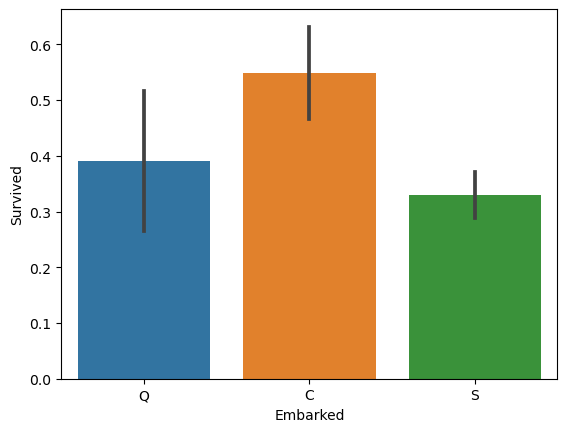

In [52]:
sns.barplot(x=df_train['Embarked'],y=df_train['Survived'] )

### Findings:
* Women and passengers from higher classes had a better chance of survival.62%
* Women in Pclass 3 had lower survival rates than Pclass 1 and 2, which are above 90%. Men from Pclass 1 had slightly better survival rates than men in other classes.
* Having family members improves survival than those travelling alone. On the contrary bigger familes sink together!
* Passengers who embarked in C=Cherbourg had more chance of survival, followed by Q=Queenstown

### Continuous Variables: Age, Fare vs Survival

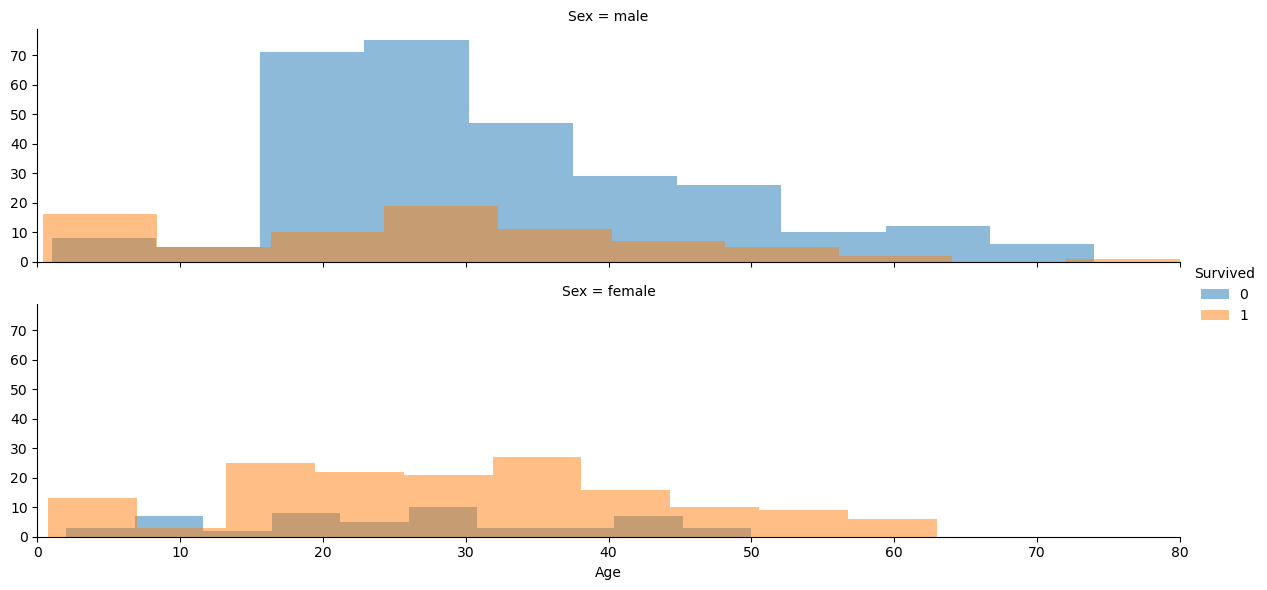

In [53]:
plot_distribution( df_train , var = 'Age' , target = 'Survived', row = 'Sex')

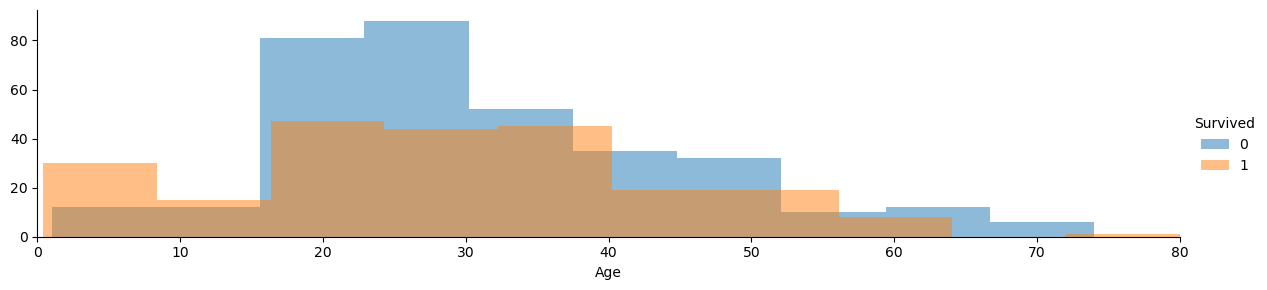

In [20]:
plot_distribution( df_train , var = 'Age' , target = 'Survived')

In [21]:
child = df_train[(df_train['Age']<=10)]
pd.pivot_table(child, index = ['Sex'], values = 'Survived')

,Survived
Sex,
female,0.608696
male,0.642857


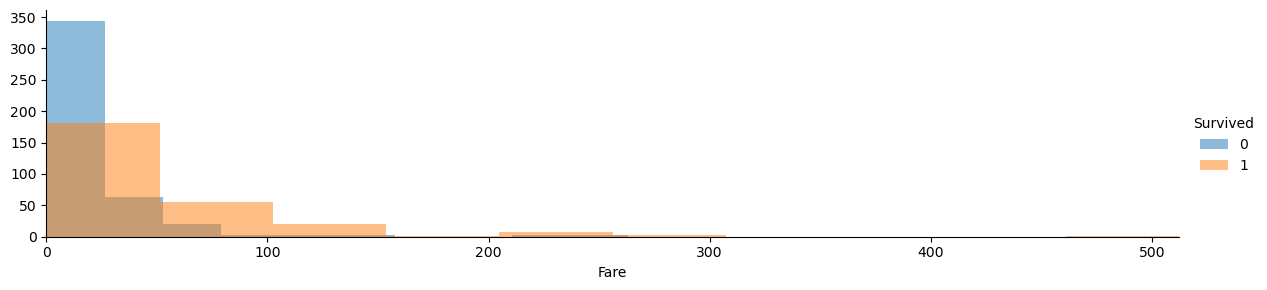

In [22]:
plot_distribution( df_train , var = 'Fare' , target = 'Survived')

In [19]:
print(df_full)

[     PassengerId  Survived  Pclass  \
301          302         1       3   
309          310         1       1   
516          517         1       2   
120          121         0       2   
570          571         1       2   
..           ...       ...     ...   
715          716         0       3   
767          768         0       3   
72            73         0       2   
235          236         0       3   
37            38         0       3   

                                           Name  Sex   Age  SibSp  Parch  \
301                          McCoy, Mr. Bernard    0   NaN      2      0   
309              Francatelli, Miss. Laura Mabel    1  30.0      0      0   
516                Lemore, Mrs. (Amelia Milley)    1  34.0      0      0   
120                 Hickman, Mr. Stanley George    0  21.0      2      0   
570                          Harris, Mr. George    0  62.0      0      0   
..                                          ...  ...   ...    ...    ...   
715  Sohol

### Findings
* Among males,  64.3% children age <=10 survived. The survival rate got lower as age increased, with an exception of age 80.
* Among females, 61% children age <=10 survived, whereas, women in general had a good chance of survival.
* Overall, children had better survival rates than adults
*  Passengers who paid more fare had better chance of survival.

### Decisions
Age and Fare are continuous variables. These variables can be converted into categorical / ordinals by diving them into bands and assigning each band an ordinal value.


## Feature Extraction and Data Cleaning 

**Missingness**
* Filling missing Embarked in df_train: with most common port of embarkation
* Filling missing fare df_test: with the median fare
* Filling Missing Age : using KNN. lets push this task to post feature extraction, title could help with filling missing age.

**Features to numeric**
* Converting Sex to numeric (male:0 female:1)
* Converting Embarked to numeric (S:0, C:1, Q:2)

**Binning FamilySize**
 * FamilySize =1 | alone|  ordinal =0
 * FamilySize >1 and < 4 | small family | ordinal =1
 * FamilySize >4 | Large Family | ordinal = 2
 
** Binning: Age bands and Fare bands**
* Age: Ordinal age bands - By dividing age into 5 age groups
* Fare: Ordinal fare bands - By dividing into 4 groups based on quantiles

** Extracting new features**
 * **Title** counting number of titles in entire dataset (both test and train, since both need cleaning) , replacing rare titles and synonymous titles, giving category number to each title

**Dropping columns**
* Ticket
* PassengerId
* Name
* Cabin

In [60]:
for dataset in df_full:
    family_size = dataset.SibSp + dataset.Parch +1 #including themselves
    dataset['FamilySize'] = family_size

In [62]:
for dataset in df_full:
    family_size = dataset['SibSp'] + dataset.Parch +1 #including themselves
    dataset['FamilySize'] = family_size

In [63]:
#missing Embarked
port_mode = df_train.Embarked.mode()[0]
#port_mode
df_train['Embarked'] = df_train['Embarked'].fillna(port_mode)

#missing Fare
fare_median = df_test.Fare.median()
#fare_median
df_test['Fare'] = df_test['Fare'].fillna(fare_median)

In [65]:
dataset = dataset.fillna(0)

In [66]:
#numeric values for Sex
for dataset in df_full:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [67]:
#numeric values to Embarked
for dataset in df_full:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0 , 'C':1 , 'Q':2}).astype(int)

In [68]:
# Grouping Family Size to Ordinals
for dataset in df_full:
    dataset['FamilySize'] = dataset['FamilySize'].replace([1], 0)
    dataset['FamilySize'] = dataset['FamilySize'].replace([2,3,4], 1)
    dataset['FamilySize'] = dataset['FamilySize'].replace([5,6,7,8,9,10,11], 2)

pd.pivot_table(df_train, index = 'FamilySize' , values= 'Survived')

,Survived
FamilySize,
0,0.286385
1,0.580913
2,0.155556


In [69]:
#quantiles for fare attribute
pd.qcut(df_train['Fare'],4, retbins=True)[1]

array([  0.    ,   7.8958,  14.4583,  30.6958, 512.3292])

In [70]:
#creating same bins for fare bands in train and test based on quantiles in train
#giving ordinal labels 0-3

bins = [0,7.91,14.454,31.0,513.0]
labels = [0,1,2,3]

for dataset in df_full:
    dataset['Fareband'] = pd.cut(dataset['Fare'], bins=bins, labels=labels, include_lowest = True)
    dataset['Fareband'] = dataset['Fareband'].astype(int)

pd.pivot_table(df_train, index = df_train['Fareband'],values = 'Survived' )

,Survived
Fareband,
0,0.187845
1,0.305882
2,0.422460
3,0.597701


In [71]:
for dataset in df_full:
 dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [72]:
# to get an idea of all titles in both datasets (to make cleaning easier)
all_titles = df_test['Title'].append(df_train['Title'])
pd.crosstab(all_titles,'count')

/tmp/ipykernel_702423/2979124154.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_titles = df_test['Title'].append(df_train['Title'])


col_0,count
Title,
Capt,1
Col,2
Countess,1
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40


In [73]:
for dataset in df_full:
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme'], 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Don','Jonkheer','Major','Sir','Rev','Dr'],'Raremale')
    dataset['Title'] = dataset['Title'].replace(['Countess','Dona','Lady'],'Rarefemale')

In [74]:
pd.pivot_table(df_train, index = df_train['Title'], values = 'Survived')

,Survived
Title,
Master,0.656250
Miss,0.689655
Mr,0.144578
Mrs,0.803922
Rarefemale,1.000000
Raremale,0.250000


In [75]:
title_map = {"Master":1, "Miss":2, "Mr":3, "Mrs":4, "Rarefemale":5, "Raremale":6}
for dataset in df_full:
    dataset['Title'] = dataset['Title'].map(title_map)
    

In [76]:
df_train.head()
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fareband,Title
301,302,1,3,"McCoy, Mr. Bernard",0,NaN,2,0,367226,23.2500,NaN,2,1,2,3
309,310,1,1,"Francatelli, Miss. Laura Mabel",1,30.0,0,0,PC 17485,56.9292,E36,1,0,3,2
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",1,34.0,0,0,C.A. 34260,10.5000,F33,0,0,1,4
120,121,0,2,"Hickman, Mr. Stanley George",0,21.0,2,0,S.O.C. 14879,73.5000,NaN,0,1,3,3
570,571,1,2,"Harris, Mr. George",0,62.0,0,0,S.W./PP 752,10.5000,NaN,0,0,1,3


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fareband,Title
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",1,48.0,0,0,17466,25.9292,D17,0,0,2,4
223,224,0,3,"Nenkoff, Mr. Christo",0,NaN,0,0,349234,7.8958,NaN,0,0,0,3
84,85,1,2,"Ilett, Miss. Bertha",1,17.0,0,0,SO/C 14885,10.5000,NaN,0,0,1,2
680,681,0,3,"Peters, Miss. Katie",1,NaN,0,0,330935,8.1375,NaN,2,0,1,2
535,536,1,2,"Hart, Miss. Eva Miriam",1,7.0,0,2,F.C.C. 13529,26.2500,NaN,0,1,2,2


### Fill in missing age, creating age bands, mapping age bands to ordinals


In [77]:
#dropping columns which we may not need / use
for dataset in df_full:
    dataset.drop(['Name','SibSp','Parch','Ticket','Cabin','Fare'], axis= 1, inplace = True)

In [78]:
#dataframes we are left with : age still has missing values
df_train.head()
df_test.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,FamilySize,Fareband,Title
301,302,1,3,0,NaN,2,1,2,3
309,310,1,1,1,30.0,1,0,3,2
516,517,1,2,1,34.0,0,0,1,4
120,121,0,2,0,21.0,0,1,3,3
570,571,1,2,0,62.0,0,0,1,3


,PassengerId,Survived,Pclass,Sex,Age,Embarked,FamilySize,Fareband,Title
862,863,1,1,1,48.0,0,0,2,4
223,224,0,3,0,NaN,0,0,0,3
84,85,1,2,1,17.0,0,0,1,2
680,681,0,3,1,NaN,2,0,1,2
535,536,1,2,1,7.0,0,1,2,2


In [98]:
from sklearn.impute import KNNImputer

In [99]:
# define imputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')

In [104]:
#impute age in df_train and df_test
for dataset in df_full:
    new_df = dataset[['PassengerId','Pclass','Sex','Age','Embarked','FamilySize','Fareband','Title']]
    # fit on the dataset
    imputer.fit(new_df)
    filled = imputer.transform(new_df)
    #dataset.head()
    #dataset.isnull().sum()
    filled = imputer.transform(new_df)
    filled = pd.DataFrame(filled, columns =['PassengerId','Pclass','Sex','Age','Embarked','FamilySize','Fareband','Title'])
    dataset['Age'] = filled['Age']
    dataset.head()
    #dataset.isnull().sum()
    dataset = dataset.fillna(0)
    dataset.isnull().sum()

KNNImputer(n_neighbors=3)

,PassengerId,Survived,Pclass,Sex,Age,Embarked,FamilySize,Fareband,Title,Ageband
301,302,1,3,0,35.0,2,1,2,3,1
309,310,1,1,1,35.0,1,0,3,2,1
516,517,1,2,1,5.0,0,0,1,4,0
120,121,0,2,0,17.0,0,1,3,3,1
570,571,1,2,0,19.0,0,0,1,3,0


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
FamilySize     0
Fareband       0
Title          0
Ageband        0
dtype: int64

KNNImputer(n_neighbors=3)

,PassengerId,Survived,Pclass,Sex,Age,Embarked,FamilySize,Fareband,Title
862,863,1,1,1,NaN,0,0,2,4
223,224,0,3,0,NaN,0,0,0,3
84,85,1,2,1,22.666667,0,0,1,2
680,681,0,3,1,NaN,2,0,1,2
535,536,1,2,1,NaN,0,1,2,2


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
FamilySize     0
Fareband       0
Title          0
dtype: int64

In [ ]:
#dataset = dataset.fillna(0)

In [101]:
#impute age in df_train and df_test
#for dataset in df_full:
    #new_df = dataset[['PassengerId','Pclass','Sex','Age','Embarked','FamilySize','Fareband','Title']]
    #filled = KNN(k=3).complete(new_df)
    #filled = pd.DataFrame(filled, columns =['PassengerId','Pclass','Sex','Age','Embarked','FamilySize','Fareband','Title'])
#separate modifying original dataframe, add histograms for comparison
    #dataset['Age'] = filled['Age']
    #dataset.head()
    #dataset.isnull().sum()


In [ ]:
#hist before and after imputation
#plt.hist(filled['Age'],bins=10, alpha=0.5)
#plt.hist(new_df.Age[~np.isnan(df_train.Age)], bins =10, alpha = 0.5)

In [ ]:
#plt.hist(filled_df['Age'],bins=10, alpha=0.5)
#plt.hist(df_train.Age[~np.isnan(df_train.Age)], bins =10, alpha = 0.5)
#plt.hist(df_test.Age[~np.isnan(df_test.Age)], bins =10, alpha = 0.5)

In [108]:
#Discretize age into 5 equal groups and assign ordinal agebands
pd.cut(df_train['Age'],5).unique()
bins = [0,16,32,48,64,80]
labels = [0,1,2,3,4]

for dataset in df_full:
    dataset['Ageband'] = pd.cut(dataset['Age'],bins = bins,labels = labels, include_lowest=True)
    dataset['Ageband'] = pd.to_numeric(dataset['Ageband'], errors='coerce')
    dataset = dataset.dropna(subset=['Ageband'])
    dataset['Ageband'] = dataset['Ageband'].astype(int)

pd.pivot_table(df_train, index = ['Ageband'],values = 'Survived',columns=['Sex'])

[(29.852, 44.568], (0.346, 15.136], (15.136, 29.852], NaN, (44.568, 59.284], (59.284, 74.0]]
Categories (5, interval[float64, right]): [(0.346, 15.136] < (15.136, 29.852] < (29.852, 44.568] < (44.568, 59.284] < (59.284, 74.0]]

/tmp/ipykernel_702423/190100378.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Ageband'] = dataset['Ageband'].astype(int)
/tmp/ipykernel_702423/190100378.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Ageband'] = dataset['Ageband'].astype(int)


Sex,0,1
Ageband,,
0.0,0.090909,0.800000
1.0,0.193416,0.733813
2.0,0.154930,0.705882
3.0,0.333333,0.888889
4.0,0.333333,0.250000


In [109]:
for dataset in df_full:
    dataset.drop("Age", axis= 1, inplace = True)
    
df_train.head()
df_test.head()

,PassengerId,Survived,Pclass,Sex,Embarked,FamilySize,Fareband,Title,Ageband
301,302,1,3,0,2,1,2,3,2.0
309,310,1,1,1,1,0,3,2,2.0
516,517,1,2,1,0,0,1,4,0.0
120,121,0,2,0,0,1,3,3,1.0
570,571,1,2,0,0,0,1,3,1.0


,PassengerId,Survived,Pclass,Sex,Embarked,FamilySize,Fareband,Title,Ageband
862,863,1,1,1,0,0,2,4,NaN
223,224,0,3,0,0,0,0,3,NaN
84,85,1,2,1,0,0,1,2,1.0
680,681,0,3,1,2,0,1,2,NaN
535,536,1,2,1,0,1,2,2,NaN


## Model Building and Prediction
* Creating variables for building our models
* Training the models
* Calculating accuracy/score (during training)

In [156]:
# Variables needed for building prediction model
X_train = df_train.drop(["Survived","PassengerId"], axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop(["Survived","PassengerId"], axis=1).copy() 

In [157]:
X_train.fillna(X_train.mean(), inplace=True)
Y_train.fillna(X_train.mean(), inplace=True)
#Y_test.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)


In [158]:
X_train.isnull().sum()

Pclass        0
Sex           0
Embarked      0
FamilySize    0
Fareband      0
Title         0
Ageband       0
dtype: int64

In [159]:
X_test.isnull().sum()

Pclass        0
Sex           0
Embarked      0
FamilySize    0
Fareband      0
Title         0
Ageband       0
dtype: int64

In [160]:
X_test.fillna(X_test.mean())

,Pclass,Sex,Embarked,FamilySize,Fareband,Title,Ageband
862,1,1,0,0,2,4,1.230503
223,3,0,0,0,0,3,1.230503
84,2,1,0,0,1,2,1.000000
680,3,1,2,0,1,2,1.230503
535,2,1,0,1,2,2,1.230503
...,...,...,...,...,...,...,...
796,1,1,0,0,2,6,1.230503
815,1,0,0,0,0,3,1.230503
629,3,0,2,0,0,3,1.230503
421,3,0,2,0,0,3,1.230503


In [176]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
#Y_pred
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

LogisticRegression()

78.93

In [177]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

SVC()

84.27

In [178]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

DecisionTreeClassifier()

89.04

In [179]:
#KNN k=3

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

KNeighborsClassifier(n_neighbors=3)

86.66

In [180]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

GaussianNB()

77.25

In [181]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

Perceptron()

77.81

In [182]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

SGDClassifier()

68.26

In [183]:
#X_train['Fareband'] = X_train['Fareband'].astype('int')
#X_train.apply(pd.to_numeric)
X_train.info()

xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
y_pred = xgb.predict(X_test)

acc_xgb = round(sgd.score(X_train, Y_train) * 100, 2)
acc_xgb


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 301 to 37
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      712 non-null    int64  
 1   Sex         712 non-null    int64  
 2   Embarked    712 non-null    int64  
 3   FamilySize  712 non-null    int64  
 4   Fareband    712 non-null    int64  
 5   Title       712 non-null    int64  
 6   Ageband     712 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 44.5 KB


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

68.26

In [184]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

Y_pred

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

RandomForestClassifier()

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0])

0.8904494382022472

89.04

## Model Evaluation
* Comparing the scores of various ML algorithms

In [185]:
# Model Evaluation

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'XGBoost', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_xgb, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.04
8,Decision Tree,89.04
1,KNN,86.66
0,Support Vector Machines,84.27
2,Logistic Regression,78.93
5,Perceptron,77.81
4,Naive Bayes,77.25
6,Stochastic Gradient Decent,68.26
7,XGBoost,68.26


In [ ]:
#From the models used, Random Forest and Decision Tree have the best scores